# BOSTON AIRBNB BOOKING BUSINESS 


## SECTION 1: BUSINESS UNDERSTANDING

Let see something about Airbnb Boston booking situation. From this dataset, we will find the answers for 3 questions below:

**1. How is the rooms' situation in Boston?**

**2. How is the business in Boston?**

**3. What makes a host become top booking?**
 
    
    

## SECTION 2: DATA UNDERSTANDING

In [1]:
# import the libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get the directory: 
d = os.getcwd() + '\data\\'

In [3]:
# Download csv files from https://www.kaggle.com/datasets/airbnb/boston
# We only need calendar.csv and listings.csv about the booking over the time and information of hosts in Boston
# Calendar
df_cld = pd.read_csv('calendar.csv')
df_cld.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
# Listings
df_lst = pd.read_csv('listings.csv')
df_lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [6]:
def barplot(cl_name):
    vals = df_lst(cl_name).value_counts()
    (vals/df_lst.shape[0]).plot(kind='bar')
    plt.title(cl_name)

## Section 3: DATA PREPARATION

In [12]:
# # Fill the missing price value with value from rows above to get the latest price (data was already sorted by date)
# # Change type for 'price' column to float and 'date' column to date to calculate easily
df_cld['price'] = df_cld['price'].fillna(method='ffill')
df_cld['price'] = df_cld['price'].apply(lambda x: x.replace('$', '').replace(',', '') if type(x) != float else x)
df_cld['date'] = pd.to_datetime(df_cld['date'])
df_cld['price'] = df_cld['price'].astype('float')
df_cld

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,62.0
1308886,14504422,2016-09-09,f,62.0
1308887,14504422,2016-09-08,f,62.0
1308888,14504422,2016-09-07,f,62.0


In [13]:
# check dataframe's information
df_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [14]:
# change type of 'price' and 'date' column (make it easier to make calculation)
df_lst['price'] = df_lst['price'].apply(lambda x: x.replace('$', '').replace(',', '') if type(x) != float else x)
df_lst['price'] = df_lst['price'].astype('float32')

In [15]:
df_lst['date'] = pd.to_datetime(df_cld['date'])

In [16]:
# create new dataframe with the necessary columns
cols = ['id','name','host_total_listings_count','smart_location','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price',
                   'guests_included','neighbourhood','minimum_nights','number_of_reviews','review_scores_rating']
df_info = df_lst[cols]
df_info.head(3)

,id,name,host_total_listings_count,smart_location,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,neighbourhood,minimum_nights,number_of_reviews,review_scores_rating
0,12147973,Sunny Bungalow in the City,1,"Boston, MA",House,Entire home/apt,4,1.5,2.0,3.0,250.0,1,Roslindale,2,0,NaN
1,3075044,Charming room in pet friendly apt,1,"Boston, MA",Apartment,Private room,2,1.0,1.0,1.0,65.0,0,Roslindale,2,36,94.0
2,6976,Mexican Folk Art Haven in Boston,1,"Boston, MA",Apartment,Private room,2,1.0,1.0,1.0,65.0,1,Roslindale,3,41,98.0


## SECTION 4: DATA EVALUATION

### First question: How is the rooms' situation in Boston?
### Scale of places used for renting
We will use the scale of places in Boston to know how big the places are in Boston in 2016

In [17]:
# Divide the number of beds into 3 types and count the numbers of places per type
place_scale_df = df_info[['id', 'beds']].dropna()
place_scale_df['beds_range'] = pd.cut(place_scale_df['beds'], bins=3)
df_2 = place_scale_df.groupby('beds_range')['beds'].count()
df_2.index = list(map(lambda x: str(x)[1:-1].replace(',', ' ->'), list(df_2.index)))
df_2
    

-0.016 -> 5.333    3543
5.333 -> 10.667      32
10.667 -> 16.0        1
Name: beds, dtype: int64

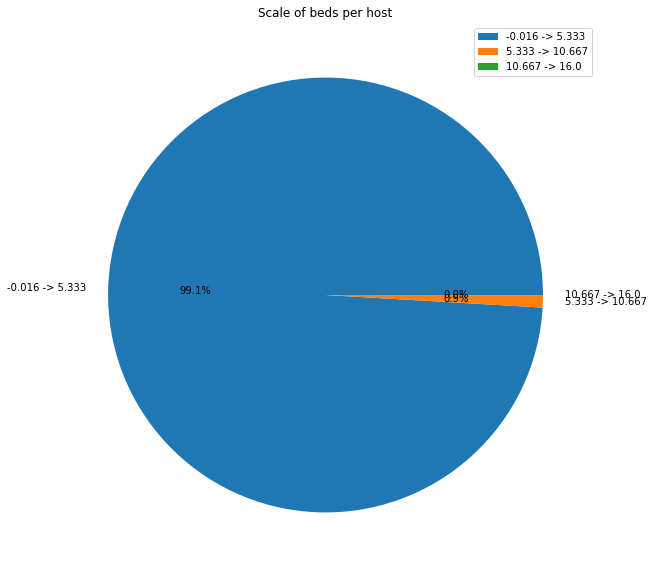

In [18]:
# Visualize the types of bed by using pie chart
plt.figure(figsize=(10,10))
plt.pie(df_2, labels = df_2.index, autopct='%1.1f%%' )
plt.legend()
plt.title('Scale of beds per host')
plt.show()

From the chart above, the majority of the places (about 99.1 %) used for renting in are small in size and have less than 5 beds, almost the rest are in the middle range with 5 to 10 beds and there is only 1 large-size place with more than 10 beds. 

### Room type 

In [20]:
# count the numbers of places per type of room
df_room_type = df_info['room_type'].value_counts()
df_room_type

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

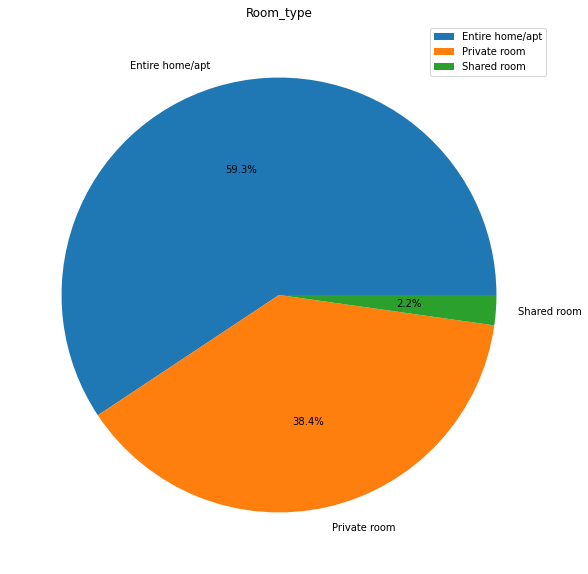

In [21]:
# visualize the room type by using pie chart
plt.figure(figsize=(10,10))
plt.pie(df_room_type, labels = df_room_type.index, autopct='%1.1f%%' )
plt.legend()
plt.title('Room_type')
plt.show()

There are 2127 places for rent in Boston are entire home/apartment (59.3 % out of total). 38.4 % in the number of the place are private room type and only 80 out of 3585 (2.2%) are shared room 

### Second question: How is the business in Boston?

### Booking and Revenue

In [22]:
# create the dataframe about booking in 2016
df_booked = df_cld[df_cld['available'] == 'f']
df_booked

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,62.0
1308886,14504422,2016-09-09,f,62.0
1308887,14504422,2016-09-08,f,62.0
1308888,14504422,2016-09-07,f,62.0


In [23]:
 # business situation over the time (2016)
df_business = df_booked.groupby('date').agg({'available': 'count', 'price':'sum'}).reset_index()
df_business

,date,available,price
0,2016-09-06,3016,550482.0
1,2016-09-07,2654,456465.0
2,2016-09-08,2587,442636.0
3,2016-09-09,2605,444629.0
4,2016-09-10,2630,447678.0
...,...,...,...
360,2017-09-01,1791,359343.0
361,2017-09-02,1788,358929.0
362,2017-09-03,1784,358413.0
363,2017-09-04,1785,358818.0


Text(0.5, 1.0, 'Booked over time')

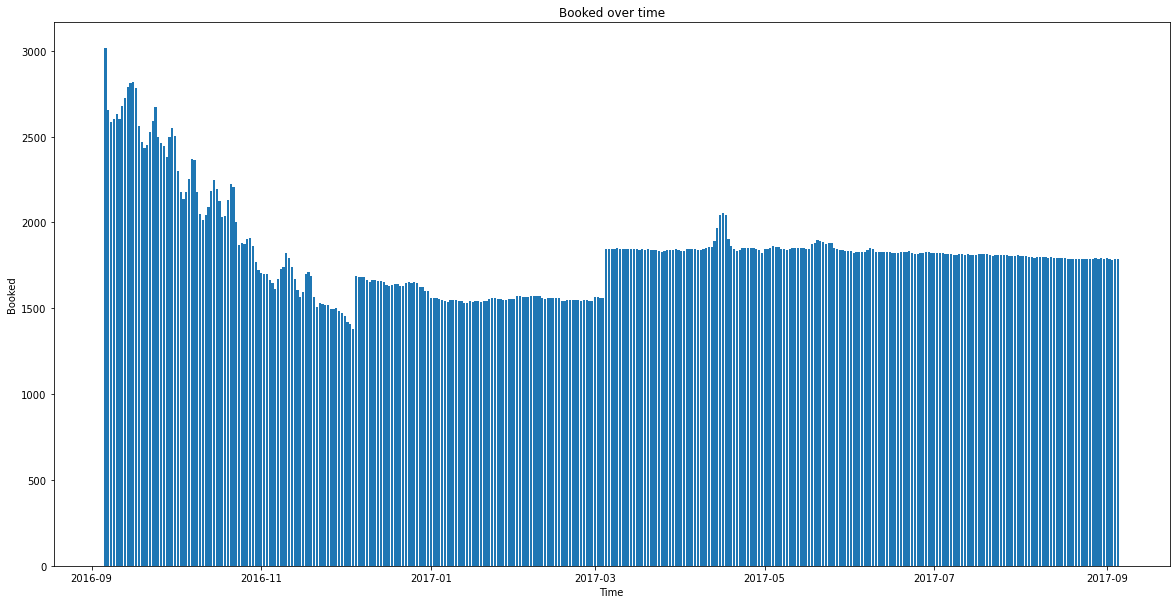

In [24]:
# visualize the booking situation over the time by using bar chart
plt.figure(figsize=(20,10))
plt.bar(df_business['date'],df_business['available'])
plt.xlabel('Time')
plt.ylabel('Booked')
plt.title('Booked over time')

Text(0.5, 1.0, 'Revenue over time')

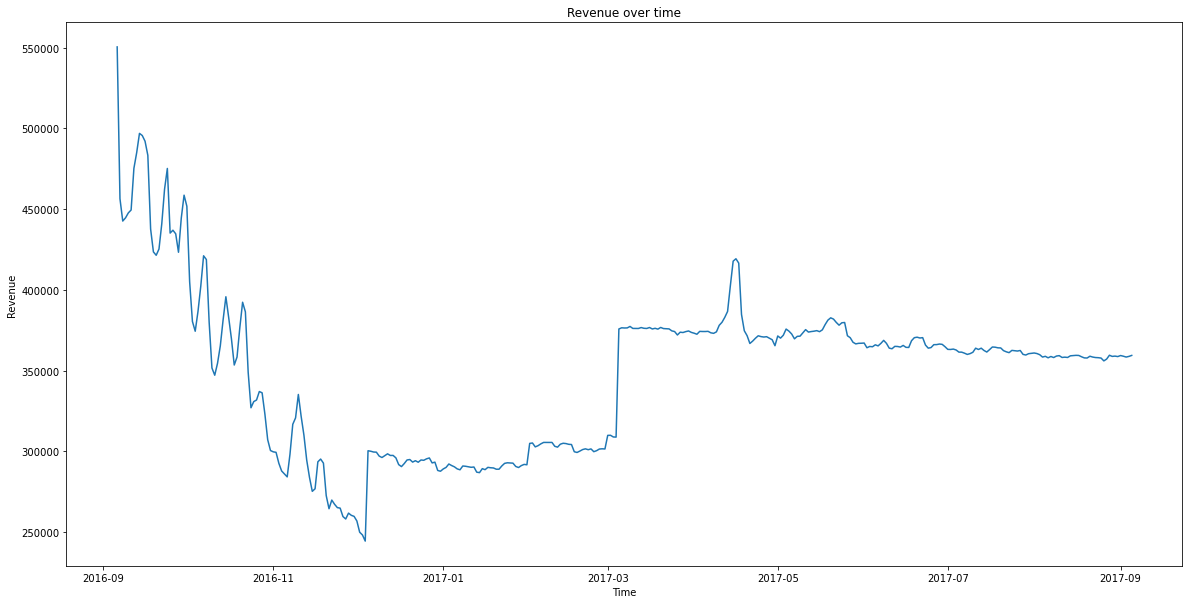

In [25]:
# visualize the trend of revenue during 2016 by using line chart
plt.figure(figsize=(20,10))
plt.plot(df_business['date'],df_business['price'])
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.title('Revenue over time')

As shown in the charts above, the booking pattern can be divided into 3 sections. While the bar chrt cover the complete income and the line charts show the accessibility rate, these two measures are very similar and pursue the previously mentioned directions.
- The first part from September to December shows a dramatic decrease. After that, there is an unexpected increase occurs in the following months.
- Another spikes happens in the start of May and reaches a peak at the end of the month before falling in the next month. 
- Then it shows insignificantly gradual decrease until the end of the period. 

There patterns can be caused by both inside and outside factors.

### Third question: What makes a host become top booking?


### Top booking
We will take a look at the top 10% of most popular rental locations and find out the characteristics that make these places become the hottest choices.

In [26]:
# count the number of booked days of each place
df_booked_1 = df_booked.groupby('listing_id').agg({'available': 'count', 'price':'sum'}).sort_values(by=['available'], ascending = False)
df_booked_1

,available,price
listing_id,,
12898806,570,140922.0
8626752,365,41975.0
11624428,365,49275.0
11553697,365,21900.0
11569156,365,23725.0
...,...,...
12494334,1,100.0
14584547,1,295.0
1755376,1,299.0


In [27]:
# top 10% top booking place
df_booked_top = df_booked_1.head(int(len(df_booked_1)*0.1))
df_booked_top

,available,price
listing_id,,
12898806,570,140922.0
8626752,365,41975.0
11624428,365,49275.0
11553697,365,21900.0
11569156,365,23725.0
...,...,...
8410270,365,54020.0
8406972,365,47085.0
8391298,365,58400.0


In [28]:
# list out the ID of the most booked places
cols1 = list(df_booked_1.index)

In [29]:
# divide the rental places into 5 categories of prices
price_top_booking_df = df_booked_top[['price']].dropna()
price_top_booking_df['price_range'] = pd.cut(price_top_booking_df['price'], bins=5)
df_1 = price_top_booking_df.groupby('price_range')['price'].count()
df_1.index = list(map(lambda x: str(x)[1:-1].replace(',', ' ->'), list(df_1.index)))
df_1

3754.39 -> 56137.0      186
56137.0 -> 108259.0      97
108259.0 -> 160381.0     44
160381.0 -> 212503.0     17
212503.0 -> 264625.0      4
Name: price, dtype: int64

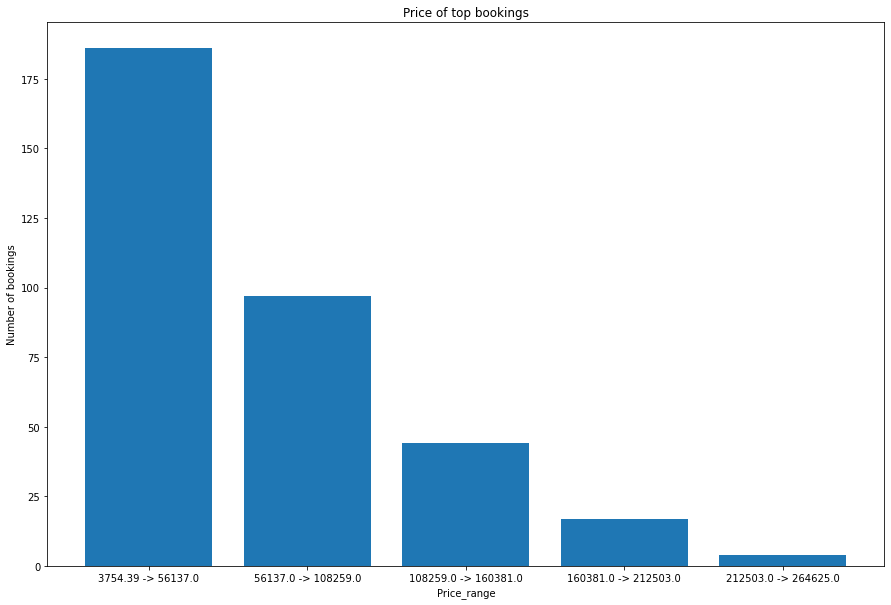

In [30]:
# visualize the levels of prices by using bar chart
plt.figure(figsize=(15,10))        
plt.bar(df_1.index, df_1.values)

plt.xlabel('Price_range')
plt.ylabel('Number of bookings')
plt.title('Price of top bookings')
plt.show()

- From the given data in Boston, it is easy to say that when deciding to rent a room, the customers will consider price as a fundamental criteria. More specifically, we can see that 10% top booked places, the mass of them are in affordable price range (from $3754.29 to $56137) per night.
- The popularity of the price ranges decreases by the increase of price.


## Section 5: CONCLUSION
In this article, we investigated about the Airbnb in Boston by using Kaggle dataset
- From the abrupt spike in the given information, we can explore further and sort out what occurs during a specific period.
- Boston can be considered as a pretty protential market and the rental room will take place in 3 cycles/ 12 months, each period lasts 3 to 4 months.
- We can find some tips to make a place more attractive to the customers and the price is the top criteria when people considering renting a place.